In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
data_dir = pathlib.Path('D:/Pemrograman/NEW ME!!/Python/Iseng/Monster Hunter Classification/images')

In [17]:
monster_image_dir = {
    'alatreon' : list(data_dir.glob('alatreon/*')),
    'rathalos' : list(data_dir.glob('rathalos/*')),
    'rathian' : list(data_dir.glob('rathian/*')),
    'teostra' : list(data_dir.glob('teostra/*')),
    'velkhana' : list(data_dir.glob('velkhana/*')),
}

In [18]:
monster_label_dir = {
    'alatreon' : 0,
    'rathalos' : 1,
    'rathian' : 2,
    'teostra' : 3,
    'velkhana' : 4,
}

In [19]:
""" im = PIL.Image.open(monster_image_dir['alatreon'][3])
rgb_im = im.convert('RGB')
rgb_im.save('alatreon_2.jpg') """

" im = PIL.Image.open(monster_image_dir['alatreon'][3])\nrgb_im = im.convert('RGB')\nrgb_im.save('alatreon_2.jpg') "

In [20]:
x = []
y = []

for monster_name, foto_set in monster_image_dir.items():
    for foto in foto_set:
        iniFoto = cv2.imread(str(foto))
        fotoResize = cv2.resize(iniFoto, (640, 360))
        x.append(fotoResize)
        y.append(monster_label_dir[monster_name])

In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
x[0].shape

(360, 640, 3)

In [23]:
x = np.array(x)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [25]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [26]:
x_train_scaled[0]

array([[[0.98039216, 1.        , 0.98431373],
        [0.97254902, 0.99607843, 0.97647059],
        [0.96862745, 0.99215686, 0.97254902],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.98039216, 0.98823529, 0.98039216],
        [0.97647059, 0.98431373, 0.97647059],
        [0.95294118, 0.96470588, 0.95686275],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.98431373, 0.98431373, 0.98039216],
        [0.99215686, 0.98823529, 0.98823529],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

## **MODELLING**

In [27]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip(
        'horizontal',
        input_shape = (360, 640, 3)
    ),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

In [28]:
num_classes = 5

model = Sequential(([
    #Data Augmentation
    data_augmentation,
    #Convolusional
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),

    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),

    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.1),
    #Flatten dulu sebelum dense network
    layers.Flatten(),
    #Dense Network
    layers.Dense(256, activation = 'relu'),
    layers.Dropout(0.1),
    layers.Dense(num_classes, activation = 'softmax')
]))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #Tidak menggunakan One Hot Encoding
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30


2/2 [==============================] - 35s 4s/step - loss: 2.6393 - accuracy: 0.2750
Epoch 2/30
2/2 [==============================] - 11s 2s/step - loss: 1.7843 - accuracy: 0.1750
Epoch 3/30
2/2 [==============================] - 11s 2s/step - loss: 1.6615 - accuracy: 0.2250
Epoch 4/30
2/2 [==============================] - 10s 2s/step - loss: 1.6138 - accuracy: 0.2000
Epoch 5/30
2/2 [==============================] - 10s 2s/step - loss: 1.5836 - accuracy: 0.2750
Epoch 6/30
2/2 [==============================] - 11s 2s/step - loss: 1.6045 - accuracy: 0.2500
Epoch 7/30
2/2 [==============================] - 11s 2s/step - loss: 1.6007 - accuracy: 0.2250
Epoch 8/30
2/2 [==============================] - 10s 2s/step - loss: 1.5600 - accuracy: 0.3500
Epoch 9/30
2/2 [==============================] - 11s 2s/step - loss: 1.5444 - accuracy: 0.3500
Epoch 10/30
2/2 [==============================] - 11s 2s/step - loss: 1.5256 - accuracy: 0.3250
Epoch 11/30
2/2 [====================

In [29]:
model.evaluate(x_test_scaled, y_test)

1/1 [==============================] - 2s 2s/step - loss: 1.3621 - accuracy: 0.6364


[1.3620680570602417, 0.6363636255264282]

In [30]:
predicted_y = model.predict(x_test_scaled)
predicted_y = [np.argmax(element) for element in predicted_y]
predicted_y

1/1 [==============================] - 1s 623ms/step


[3, 1, 0, 2, 2, 2, 4, 1, 2, 3, 3]

In [46]:
indeks = 6

key_list = list(monster_label_dir.keys())
val_list = list(monster_label_dir.values())

print('Gambar Sebenarnya:', key_list[y_test[indeks]])

Gambar Sebenarnya: velkhana


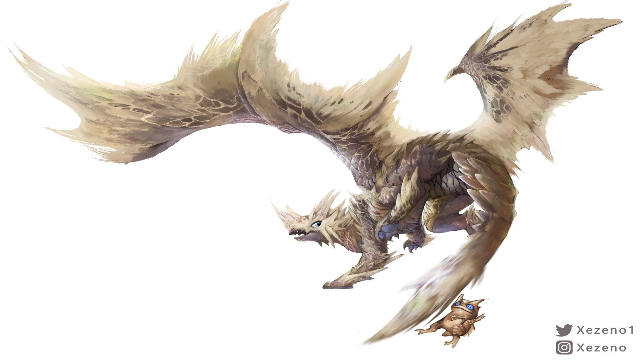

In [47]:
PIL.Image.fromarray(x_test[indeks])

In [48]:
key_list = list(monster_label_dir.keys())
val_list = list(monster_label_dir.values())

print('Prediksi:', key_list[predicted_y[indeks]])

Prediksi: velkhana
